# Guide to Network Analysis (Part 7 - Vehicle Routing Problem Service)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#What-is-a-Vehicle-Routing-Problem?" data-toc-modified-id="What-is-a-Vehicle-Routing-Problem?-1.1">What is a Vehicle Routing Problem?</a></span></li><li><span><a href="#When-is-the-VRP-service-applicable?" data-toc-modified-id="When-is-the-VRP-service-applicable?-1.2">When is the VRP service applicable?</a></span></li><li><span><a href="#About-the-Async-execution-mode" data-toc-modified-id="About-the-Async-execution-mode-1.3">About the Async execution mode</a></span></li><li><span><a href="#Work-with-Python-API-for-ArcGIS" data-toc-modified-id="Work-with-Python-API-for-ArcGIS-1.4">Work with Python API for ArcGIS</a></span></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.5">Problem statement</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Define-Input-Feature-Class" data-toc-modified-id="Define-Input-Feature-Class-2.1">Define Input Feature Class</a></span></li></ul></li><li><span><a href="#Solution-1:-A-basic-scenario" data-toc-modified-id="Solution-1:-A-basic-scenario-3">Solution 1: A basic scenario</a></span><ul class="toc-item"><li><span><a href="#The-basic-scenario" data-toc-modified-id="The-basic-scenario-3.1">The basic scenario</a></span></li><li><span><a href="#Optional-Attributes" data-toc-modified-id="Optional-Attributes-3.2">Optional Attributes</a></span></li><li><span><a href="#Solve-the-VRP" data-toc-modified-id="Solve-the-VRP-3.3">Solve the VRP</a></span></li><li><span><a href="#Tabularizing-the-response-from-solve_vehicle_routing_problem" data-toc-modified-id="Tabularizing-the-response-from-solve_vehicle_routing_problem-3.4">Tabularizing the response from solve_vehicle_routing_problem</a></span></li><li><span><a href="#Visualizing-the-response-from-from-solve_vehicle_routing_problem" data-toc-modified-id="Visualizing-the-response-from-from-solve_vehicle_routing_problem-3.5">Visualizing the response from from solve_vehicle_routing_problem</a></span></li><li><span><a href="#Saving-the-response-from-from-solve_vehicle_routing_problem-to-online" data-toc-modified-id="Saving-the-response-from-from-solve_vehicle_routing_problem-to-online-3.6">Saving the response from from solve_vehicle_routing_problem to online</a></span></li></ul></li><li><span><a href="#Solution-2:-A-modified-scenario" data-toc-modified-id="Solution-2:-A-modified-scenario-4">Solution 2: A modified scenario</a></span><ul class="toc-item"><li><span><a href="#Solve-VRP" data-toc-modified-id="Solve-VRP-4.1">Solve VRP</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Modify-the-routes-feature-class" data-toc-modified-id="Step-1:-Modify-the-routes-feature-class-4.1.1">Step 1: Modify the routes feature class</a></span></li><li><span><a href="#Step-2:-add-a-new-route_renewals-feature-class" data-toc-modified-id="Step-2:-add-a-new-route_renewals-feature-class-4.1.2">Step 2: add a new route_renewals feature class</a></span></li><li><span><a href="#Step-3:-Update-the-depots-feature-class" data-toc-modified-id="Step-3:-Update-the-depots-feature-class-4.1.3">Step 3: Update the depots feature class</a></span></li><li><span><a href="#Step-4:-add-a-new-breaks-feature-class" data-toc-modified-id="Step-4:-add-a-new-breaks-feature-class-4.1.4">Step 4: add a new breaks feature class</a></span></li><li><span><a href="#Step-5:-Run-the-Solver-again" data-toc-modified-id="Step-5:-Run-the-Solver-again-4.1.5">Step 5: Run the Solver again</a></span></li></ul></li></ul></li><li><span><a href="#Solution-3:-Delineates-work-territories" data-toc-modified-id="Solution-3:-Delineates-work-territories-5">Solution 3: Delineates work territories</a></span><ul class="toc-item"><li><span><a href="#Define-the-Route_Zone-Feature-Class" data-toc-modified-id="Define-the-Route_Zone-Feature-Class-5.1">Define the Route_Zone Feature Class</a></span></li><li><span><a href="#Modify-the-Routes-Feature-Class" data-toc-modified-id="Modify-the-Routes-Feature-Class-5.2">Modify the Routes Feature Class</a></span></li><li><span><a href="#SolveVRP" data-toc-modified-id="SolveVRP-5.3">SolveVRP</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li></ul></div>

## Introduction

Now we have learned about Network Datasets and Network Analysis Layer (NA Layer) in <a href="guide_to_network_analysis_part1.ipynb">Part 1</a>, how to find routes from one point to another, and among multiple points in <a href="guide_to_network_analysis_part2.ipynb">Part 2</a>, hwo to generate service area in <a href="guide_to_network_analysis_part3.ipynb">Part 3</a>, how to find closest facility in <a href="guide_to_network_analysis_part4.ipynb">Part 4</a>, how to create an Origin Destination Cost Matrix in <a href="guide_to_network_analysis_part5.ipynb">Part 5</a>, how to solve location allocation in <a href="guide_to_network_analysis_part6.ipynb">Part 6</a>, let's move onto the seventh topic - how to perform `Vehicle Routing Problem` service. Please refer to the road map below if you want to revisit the previous topics or jump to the next topic -

 - Network Dataset and Network Analysis Layer (<a href="guide_to_network_analysis_part1.ipynb">Part 1</a>) 
 - Find Routes (<a href="guide_to_network_analysis_part2.ipynb">Part 2</a>)
 - Generate Service Area (<a href="guide_to_network_analysis_part3.ipynb">Part 3</a>)
 - Find Closest Facility (<a href="guide_to_network_analysis_part4.ipynb">Part 4</a>)
 - Generate Origin Destination Cost Matrix (<a href="guide_to_network_analysis_part5.ipynb">Part 5</a>)
 - Solve Location Allocation (<a href="guide_to_network_analysis_part6.ipynb">Part 6</a>)
 - **Vehicle Routing Problem Service (You are here!)**
 - 3D Network Analysis Workflow (Part 8)


### What is a Vehicle Routing Problem?

The `vehicle routing problem` (VRP) is a superset of the traveling salesman problem (TSP). In a TSP, one set of stops is sequenced in an optimal fashion. In a VRP, a set of orders needs to be assigned to a set of routes or vehicles such that the overall path cost is minimized. It also needs to honor real-world constraints including vehicle capacities, delivery time windows, and driver specialties. The VRP produces a solution that honors these constraints while minimizing an objective function composed of operating costs and user preferences, such as the importance of meeting time windows  <a href="#References"> [1]</a>.

The VRP solver starts by generating an origin-destination matrix of shortest-path costs between all order and depot locations along the network. Using this cost matrix, it constructs an initial solution by inserting the orders one at a time onto the most appropriate route. The initial solution is then improved upon by re-sequencing the orders on each route, as well as moving orders from one route to another, and exchanging orders between routes. The heuristics used in this process are based on a tabu search metaheuristic and are proprietary, but these have been under continual research and development in-house at Esri for many years and quickly yield good results <a href="#References"> [1]</a>.


### When is the VRP service applicable?

Various organizations service orders with a fleet of vehicles. For example, a large furniture store might use several trucks to deliver furniture to homes. A specialized grease recycling company might route trucks from a facility to pick up used grease from restaurants. A health department might schedule daily inspection visits for each of its health inspectors. The problem that is common to these examples is the vehicle routing problem (VRP) <a href="#References"> [2]</a>.

Each organization needs to determine which orders (homes, restaurants, or inspection sites) should be serviced by each route (truck or inspector) and in what sequence the orders should be visited. The primary goal is to best service the orders and minimize the overall operating cost for the fleet of vehicles. The VRP service can be used to determine solutions for such complex fleet management tasks. In addition, the service can solve more specific problems because numerous options are available, such as matching vehicle capacities with order quantities, providing a high level of customer service by honoring any time windows on orders, giving breaks to drivers, and pairing orders so they are serviced by the same route <a href="#References"> [2]</a>.
 

### About the Async execution mode

The maximum time an application can use the vehicle routing problem service when using the asynchronous execution mode is 4 hours (14,400 seconds). If your request does not complete within the time limit, it will time out and return a failure. When using the synchronous execution mode, the request must complete within 60 seconds. If your request takes longer, the web server handling the request will time out and return the appropriate HTTP error code in the response <a href="#References"> [2]</a>.

### Work with Python API for ArcGIS

The ArcGIS API for Python provides a tool called `solve_vehicle_routing_problem` to solve the vehicle routing problems, which is shown in the table below, along with other tools we have learned so far from previous chapters:

| Operation       | network.analysis       | 
|-----------------|------------------------|
| Route           | find_routes            | 
| Service Area     | generate_service_areas | 
| Closest Facility | find_closest_facilities| 
| OD Cost Matrix  | generate_origin_destination_cost_matrix| 
| Location Allocation  | solve_location_allocation | 
| **Vehicle Routing Problem**  | **solve_vehicle_routing_problem**| 


Defined in the `network.analysis` module, `solve_vehicle_routing_problem` supports full capabilities of operations. We will walk through the data preparation, implementation, and visualization of output here. Remember that if you run the `solve_vehicle_routing_problem` with ArcGIS Online, 2 credits will be consumed per usage.

### Problem statement

The goal of part 7 is to find the best routes for a fleet of vehicles, operated by a distribution company, to deliver goods from a distribution center to a set of 25 grocery stores. Each store has a specific quantity of demand for the goods, and each truck has a limited capacity for carrying the goods. The main objective is to assign trucks in the fleet a subset of the stores to service and to sequence the deliveries in a way that minimizes the overall transportation costs.

This can be achieved by solving a vehicle routing problem (VRP). Once the delivery sequence is determined, you will generate the turn-by-turn directions for the resulting routes, which can be electronically distributed or printed and given to the drivers to make the deliveries<a href="#References"> [4]</a>.

Three examples will be demonstrated in the following sections, covering three commonly seen scenarios, and they are namely:
 - Basic scenario, given the stores to visit, the distribution center to load supplies, and the vehicle(s) to deliver goods;
 - Modified scenario, when one of the truck drivers go on vacation, and overtime is required;
 - With work territories delineated, assuming that certain areas cannot be visited on the route (or under certain penalties if visited).
    
Before diving into the implementation, let's first prepare the required input data.

## Data Preparation


As a first step, let's import required libraries and establish a connection to your organization which could be an ArcGIS Online organization or an ArcGIS Enterprise. 

In [1]:
from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, FeatureCollection, analysis
import pandas as pd
import time
import datetime as dt

In [2]:
my_gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123')

To solve the Vehicle Routing Problem, we need orders layer with stop information, depots layer with the warehouse location information from where the routes start and routes table with constraints on routes like maximum total time the driver can work etc. To provide this information to the service, different types of inputs are supported as listed below:
 - An existing feature service that contains information for `orders` (grocery stores) and `depots` (the distribution center)
 - CSV files for self defined routes
 - JSON variables for hand-picked prohibited/restricted areas
 
Let's see how to extract the feature classes from the existing service:

### Define Input Feature Class

The existing Feature Service item contains the sublayer (id=0) for distribution center, and sublayer(id=1) for all 25 grocery stores. We will search for the item, create `FeatureLayer` object per sublayer, and then create a `FeatureSet` class object using `query()`.

<Item title:"grocery_stores_VRP_San_Francisco" type:Feature Layer Collection owner:api_data_owner>
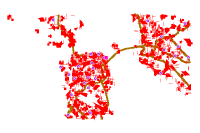

In [3]:
try:
    san_francisco_layer = my_gis.content.get("fa809b2ae20a4c18959403d87ffdc3a1")
    display(san_francisco_layer)
except RuntimeError as re:
    print("You dont have access to the item.")

First, we need to get the `orders` feature class (in this case, grocery stores) - Use this parameter to specify the orders the routes should visit. An order can represent a delivery (for example, furniture delivery), a pickup (such as an airport shuttle bus picking up a passenger), or some type of service or inspection (a tree trimming job or building inspection, for instance). When specifying the orders, you can specify additional properties for orders using attributes, such as their names, service times, time windows, pickup or delivery quantities etc.

In [4]:
stores_fl = FeatureLayer(san_francisco_layer.url + "/1")
try:
    stores_fset = stores_fl.query(where="1=1", as_df=False)
    display(stores_fset)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 25 features

In [5]:
for f in stores_fset:
    tmp1 = f.get_value("TimeStart1")
    tmp2 = f.get_value("TimeEnd1")
    f.attributes.update({"TimeWindowStart1":tmp1,
                         "TimeWindowEnd1":tmp2})

`Depots` in this case can be interpreted as the distribution center. Use this parameter to specify a location that a vehicle departs from at the beginning of its workday and returns to, at the end of the workday. Vehicles are loaded (for deliveries) or unloaded (for pickups) at depots at the start of the route.

In [6]:
distribution_center_fl = FeatureLayer(san_francisco_layer.url + "/0")
try:
    distribution_center_fset = distribution_center_fl.query(where="1=1", as_df=False)
    display(distribution_center_fset)
except RuntimeError as re:
    print("Query failed.")

<FeatureSet> 1 features

Next, we will create routes feature class with csv file. A route specifies vehicle and driver characteristics. A route can have start and end depot service times, a fixed or flexible starting time, time-based operating costs, distance-based operating costs, multiple capacities, various constraints on a driver’s workday, and so on. When specifying the routes, you can set properties for each one by using attributes. Attributes in the csv are explained below.
 - Name- The name of the route
 - StartDepotName- The name of the starting depot for the route. This field is a foreign key to the Name field in Depots.
 - EndDepotName- The name of the ending depot for the route. This field is a foreign key to the Name field in the Depots class.
 - EarliestStartTime- The earliest allowable starting time for the route.
 - LatestStartTime- The latest allowable starting time for the route.
 - Capacities- The maximum capacity of the vehicle.
 - CostPerUnitTime- The monetary cost incurred per unit of work time, for the total route duration, including travel times as well as service times and wait times at orders, depots, and breaks.
 - MaxOrderCount- The maximum allowable number of orders on the route.
 - MaxTotalTime- The maximum allowable route duration.
 
To get a featureset from dataframe, we convert the CSV to a pandas data frame using read_csv function. Note that in our CSV, EarliestStartTime and LatestStartTime values are represented as strings denoting time in the local time zone of the computer. So we need to parse these values as date-time values which we accomplish by specifying to_datetime function as the datetime parser.

When calling arcgis.network.analysis.solve_vehicle_routing_problem function we need to pass the datetime values in milliseconds since epoch. The routes_df dataframe stores these values as datetime type. We convert from datetime to int64 datatype which stores the values in nano seconds. We then convert those to milliseconds<a href="#Reference"> [4]</a>.

In [13]:
routes_csv = "data/vrp/routes.csv"

# Read the csv file
routes_df = pd.read_csv(routes_csv, parse_dates=["EarliestStartTime", "LatestStartTime"], date_parser=pd.to_datetime)
routes_df["EarliestStartTime"] = routes_df["EarliestStartTime"].astype("int64") / 10 ** 6
routes_df["LatestStartTime"] = routes_df["LatestStartTime"].astype("int64") / 10 ** 6
routes_df

,ObjectID,Name,StartDepotName,EndDepotName,StartDepotServiceTime,EarliestStartTime,LatestStartTime,Capacities,CostPerUnitTime,CostPerUnitDistance,MaxOrderCount,MaxTotalTime,MaxTotalTravelTime,MaxTotalDistance,AssignmentRule
0,1,Truck_1,San Francisco,San Francisco,60,1.571213e+12,1.571213e+12,15000,0.2,1.5,15,480,150,100,1
1,2,Truck_2,San Francisco,San Francisco,60,1.571213e+12,1.571213e+12,15000,0.2,1.5,15,480,150,100,1
2,3,Truck_3,San Francisco,San Francisco,60,1.571213e+12,1.571213e+12,15000,0.2,1.5,15,480,150,100,1


In [8]:
routes_fset = FeatureSet.from_dataframe(routes_df)
display(routes_fset)

<FeatureSet> 3 features

Once you have all the inputs as featuresets, you can pass inputs converted from different formats. The preparation step shown above is not the only way to do it. For example, depot could be a featureset geocoded from address, orders and routes could be read from csv files to convert to featureset. 

Now, we are ready to explore the implementations with three practical examples:

## Solution 1: A basic scenario


### The basic scenario

In the basic scenario, the distributor is given three required input parameters:
 - `orders` You will add the grocery store locations to the `Orders` feature class. You can think of orders as orders to be filled, since each grocery store has requested goods to be delivered to it from the distribution center. Members of the Orders class will eventually become stops along the vehicles' routes. The attributes of Stores contain information about the total weight of goods (in pounds) required at each store, the time window during which the delivery has to be made, and the service time (in minutes) incurred while visiting a particular store. The service time is the time required to unload the goods.
 - `depots` The goods are delivered from a single distribution center whose location is shown in the `DistributionCenter` feature class. The distribution center operates between 8:00 a.m. and 5:00 p.m. 
 - `routes` The distribution center has three trucks, each with a maximum capacity to carry 15,000 pounds of goods. You will add three routes (one for each vehicle) and set the properties for the routes based on the center's operational procedures.
 
### Optional Attributes

Other optional attributes include:
 -  If we need driving directions for navigation, populate_directions must be set to true.
 - `Time Attribute = TravelTime (Minutes)` The VRP solver will use this attribute to calculate time-based costs between orders and the depot. Use the default here.
 - `Distance Attribute = Meters` This attribute is used to determine travel distances between orders and the depot for constraint purposes and creating directions; however, the VRP solver's objective is to minimize time costs.  Use the default here.
 - `Default Date` is set to be the day of today (i.e. Monday)
 - `Capacity Count` is set to 1. This setting indicates that the goods being delivered have only one measurement. In this case, that measurement is weight (pounds). If the capacities were specified in terms of two measurements, such as weight and volume, then the capacity count would be set to 2.
 - Minutes is selected for `Time Field Units`. This specifies that all time-based attributes, such as ServiceTime and MaxViolationTime1 for Orders and MaxTotalTime, MaxTotalTravelTime, and CostPerUnitTime for Route, are in minutes.
 - `Distance Field Units` is set to Miles. This specifies that all distance-based attributes, such as MaxTotalDistance and CostPerUnitDistance for Routes, are in miles.
 - Since it is difficult for these delivery trucks to make U-turns, set `U-Turns at Junctions` to Not Allowed.
 - Select between `Straight Line`, `True Shape with Measures` or `True Shape option` for the `Output Shape Type`. Note that this option only affects the display of the routes, not the results determined by the VRP solver.
 - Using `Use Hierarchy` as default here (a.k.a. True). 
 
You can set `save_route_data` to True if you want to save the route data from result to local disk, which would then be used to upload to online to share with drivers eventually and share the routes in ArcGIS online or Enterprise. Individual routes are saved as route layers which could then be opened in navigator with directions(if you solve with `populate_directions`=True) <a href="#References">[4]</a>.

### Solve the VRP

The following operations can help you sort out the basic scenario - how to dispatch the three trucks in San Francisco (working from 8AM to 5PM) in delivering goods to 25 different stores. The output will also include the driving directions in Spanish.

Also note that you can set the `if_async` variable to True, when you need to execute multiple solvers in parallel.

In [9]:
if_async = False

In [10]:
%%time

current_date = dt.datetime.now().date()

result1 = network.analysis.solve_vehicle_routing_problem(orders=stores_fset, depots=distribution_center_fset, 
                                                         default_date=current_date, 
                                                         routes=routes_fset, populate_route_lines=True,
                                                         save_route_data=True,
                                                         populate_directions=True,
                                                         directions_language="es",
                                                         future=if_async)

WARNING 030194: Data values longer than 500 characters for field [Routes:StartDepotName] are truncated.
WARNING 030194: Data values longer than 500 characters for field [Routes:EndDepotName] are truncated.
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


Wall time: 17.4 s


The VRP solver calculates the three routes required to service the orders and draws lines connecting the orders. Each route begins and ends at the distribution center and serves a set of orders along the way.

Only when the job is finished and shown as succeeded can we proceed to explore the results. Otherwise, skip the rest of this section and check out the solution 2 instead.

In [11]:
if if_async:
    if result1.done():
        result1 = result1.result()
        print("Async job done!")
    else:
        print("Async job not done yet!")
print('Analysis succeeded? {}'.format(result1.solve_succeeded))

Analysis succeeded? True


Here `result1` is a `arcgis.geoprocessing._support.ToolOutput` Class object, and contains multiple objects - out_routes (FeatureSet), out_stops(FeatureSet), etc. Since that we have enabled `save_route_data`, `out_route_data` will appear in the resulting tooloutput as a dictionary object that is the url pointing to the zipped file of the route data (saved on the GIS object).

In [12]:
result1

ToolOutput(out_unassigned_stops=<FeatureSet> 0 features, out_stops=<FeatureSet> 31 features, out_routes=<FeatureSet> 3 features, out_directions=<FeatureSet> 327 features, solve_succeeded=True, out_network_analysis_layer=None, out_route_data={"url": "https://logistics.arcgis.com/arcgis/rest/directories/arcgisjobs/world/vehicleroutingproblem_gpserver/jf37fa7c9adb8401eb25e542a80649b36/scratch/_ags_rd32cf32d6867f46418b1b7b820a24f081.zip"}, out_result_file=None)

### Tabularizing the response from solve_vehicle_routing_problem

Now, let's explore the tabularized output from `solve_vehicle_routing_problem`. What will be useful for distributor and the drivers will be the summarized route information, and sequences of stops per route.

In [14]:
# Display the analysis results in a pandas dataframe.
out_routes_df = result1.out_routes.sdf
out_routes_df[['Name','OrderCount','StartTime','EndTime',
               'TotalCost','TotalDistance','TotalTime','TotalTravelTime','StartTimeUTC','EndTimeUTC']]

,Name,OrderCount,StartTime,EndTime,TotalCost,TotalDistance,TotalTime,TotalTravelTime,StartTimeUTC,EndTimeUTC
0,Truck_1,8,2019-10-16 08:00:00,2019-10-16 14:37:08.923000097,162.129803,55.133374,397.148711,149.148711,2019-10-16 15:00:00,2019-10-16 21:37:08.923000097
1,Truck_2,6,2019-10-16 08:00:00,2019-10-16 12:22:39.262000084,72.355190,13.216210,262.654374,55.654374,2019-10-16 15:00:00,2019-10-16 19:22:39.262000084
2,Truck_3,11,2019-10-16 08:00:00,2019-10-16 15:36:25.043999910,186.840470,63.704659,456.417407,145.417407,2019-10-16 15:00:00,2019-10-16 22:36:25.043999910


Based on the dataframe display of the out_routes object, we can tell the optimal routing option provided by `solve_vehicle_routing_problem` is for Truck_1 to visit 8 stops, Truck_2 to visit 6 stops, and Truck_3 to visit 11 stops. Upon this selection, the total cost will be 162.13 + 72.36 + 186.84 = 421.33, the total distance is 55.13 + 13.22 + 63.70 = 132.05, and the total travel time will be 149.15 + 55.65 + 145.42 = 350.22.

| Scenario       | Total Cost      |  Total Distance  |  Total Travel Time | Scheduled Stops |
|----------------|-----------------|------------------|------------------|------------------|
| #1             | 421.33          | 132.05           |      350.22      |      [8,6,11]      |

In [15]:
out_stops_df = result1.out_stops.sdf
out_stops_df[['Name','RouteName','Sequence','ArriveTime','DepartTime']].sort_values(by=['RouteName',
                                                                                        'Sequence'])

,Name,RouteName,Sequence,ArriveTime,DepartTime
25,San Francisco,Truck_1,1,2019-10-16 08:00:00.000000000,2019-10-16 09:00:00.000000000
20,Store_21,Truck_1,2,2019-10-16 09:23:24.568000078,2019-10-16 09:46:24.568000078
23,Store_24,Truck_1,3,2019-10-16 09:53:20.523000001,2019-10-16 10:17:20.523000001
19,Store_20,Truck_1,4,2019-10-16 10:35:41.608999968,2019-10-16 10:56:41.608999968
24,Store_25,Truck_1,5,2019-10-16 11:16:34.795000076,2019-10-16 11:39:34.795000076
22,Store_23,Truck_1,6,2019-10-16 11:44:58.622999907,2019-10-16 12:02:58.622999907
9,Store_10,Truck_1,7,2019-10-16 12:15:57.345999956,2019-10-16 12:41:57.345999956
21,Store_22,Truck_1,8,2019-10-16 12:51:14.118000031,2019-10-16 13:17:14.118000031
8,Store_9,Truck_1,9,2019-10-16 13:32:55.437000036,2019-10-16 13:59:55.437000036
26,San Francisco,Truck_1,10,2019-10-16 14:37:08.923000097,2019-10-16 14:37:08.923000097


### Visualizing the response from from solve_vehicle_routing_problem

In order to improve the re-usability of codes, we will define a method called `visualize_vehicle_routing_problem_results` to render the map, and visualize the `orders`, `depots` and the routing results calculated by the VRP solver. This method will be reused in scenarios 2 and 3 as well.

In [16]:
# Define the route symbols as blue, red and green
route_symbols = [{"type": "esriSLS",
                          "style": "esriSLSSolid",
                          "color": [0,100,240,255],"size":10},
                 {"type": "esriSLS",
                          "style": "esriSLSSolid",
                          "color": [255,0,0,255],"size":10},
                 {"type": "esriSLS",
                          "style": "esriSLSSolid",
                          "color": [100,240,0,255],"size":10}]

# Define a function to display the output analysis results in a map
def visualize_vehicle_routing_problem_results(map_widget, solve_vehicle_routing_problem_result, 
                                              orders_fset, depots_fset, zoom_level):
    # The map widget
    map_view_outputs = map_widget
    # The solve_vehicle_routing_problem analysis result
    results = solve_vehicle_routing_problem_result
    
    #Visusalize the inputs with different symbols
    map_view_outputs.draw(orders_fset, symbol={"type": "esriSMS",
                                               "style": "esriSMSCircle",
                                               "color": [76,115,0,255],"size": 8})
    map_view_outputs.draw(depots_fset, symbol={"type": "esriSMS",
                                               "style": "esriSMSSquare",
                                               "color": [255,115,0,255], "size": 10})

    #Visualize each route
    for i in range(len(results.out_routes.features)):
        out_routes_flist = []
        out_routes_flist.append(results.out_routes.features[i])
        out_routes_fset = []
        out_routes_fset = FeatureSet(out_routes_flist)
        map_view_outputs.draw(out_routes_fset, 
                              symbol=route_symbols[i%3])
    
    # Zoom out to display all of the allocated census points.
    map_view_outputs.zoom = zoom_level


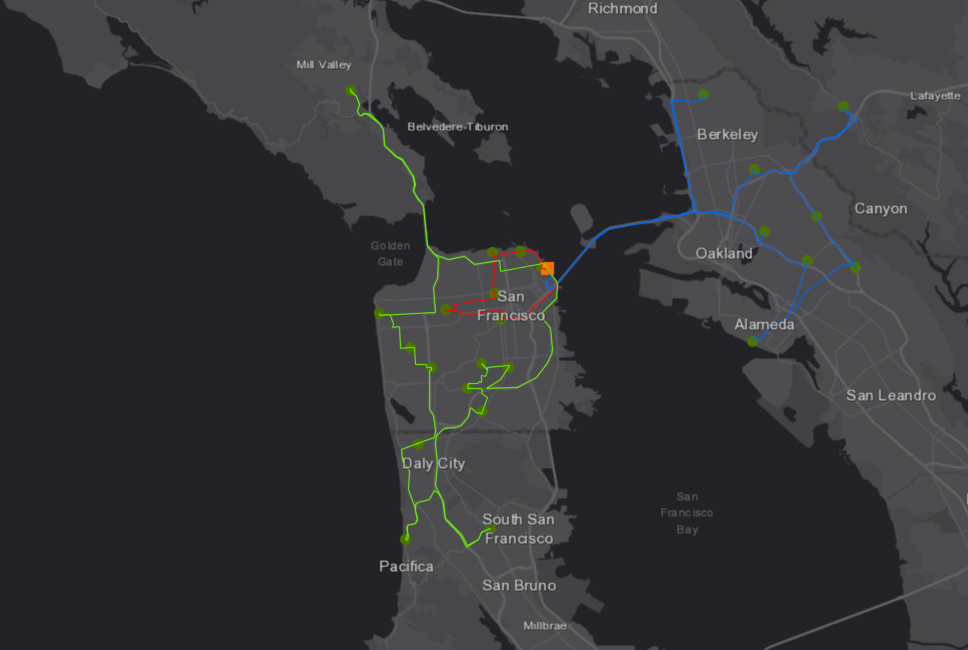

In [24]:
# Display the analysis results in a map.

# Create a map of SF, California.
map1 = my_gis.map('San Francisco, CA')
map1.basemap = 'dark-gray'
map1.layout.height = '650px'
map1

In [23]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_vehicle_routing_problem_results(map1, result1, 
                                          orders_fset=stores_fset, depots_fset=distribution_center_fset, zoom_level=8)

Judging from what's displayed in `map1`, Truck_1 (blue) tends to take care of the stores located at the east side of San Francisco, while the Truck_2 (red) and Truck_3 (green) are responsible for delivering goods to stores located at the west. Also, the difference between Truck_2 and Truck_3 is that the former handles the downtown area, and the latter focuses on the outer rim.

### Saving the response from from solve_vehicle_routing_problem to online


Save the route data from result to local disk, which would then be used to upload to online portal to share with drivers eventually and share the routes in ArcGIS online on the portal. Individual routes are saved as route layers which could then be opened in navigator with directions(if you solve with 'populate_directions'=true')

In [25]:
route_data = result1.out_route_data.download('.')
route_data_item = my_gis.content.add({"type": "File Geodatabase"}, route_data)
route_data_item

<Item title:"_ags_rd32cf32d6867f46418b1b7b820a24f081" type:File Geodatabase owner:arcgis_python>

Then, to create route layers from the route data. This will create route layers in the online or enterprise which could then be shared with drivers, so they would be able to open this in navigator.

In [26]:
route_layers = analysis.create_route_layers(route_data_item, 
                                            delete_route_data_item=True)
for route_layer in route_layers:
    route_layer.share(org=True)
    display(route_layer.homepage)
    display(route_layer)

'https://your_target_gis/home/item.html?id=6d41dbd910124ec88e941b98d8175220'

<Item title:"Truck_1" type:Feature Collection owner:arcgis_python>

'https://your_target_gis/home/item.html?id=c71c297e83904a9fac183f9c4864bfed'

<Item title:"Truck_2" type:Feature Collection owner:arcgis_python>

'https://your_target_gis/home/item.html?id=02a63587c34048d9bfd9377c39ad7ae7'

<Item title:"Truck_3" type:Feature Collection owner:arcgis_python>

## Solution 2: A modified scenario

The vehicle routing problem solution obtained earlier worked well for the company. After a few weeks, however, the driver assigned to Truck_2 went on vacation. So now the distribution company has to service the same stores but with just two trucks. To accommodate the extra workload, the company decided to pay overtime to the other two drivers and provide them with one paid break during the day. The distribution company also acquired two additional `satellite distribution centers`. These centers can be used by the trucks to renew their truckload while making their deliveries instead of returning to the main distribution center for renewal. You will modify the solution obtained from the previous solution to accommodate these changes.

 - delete an existing route, and modify `routes` to include overtime
 - add `route renewals`
 - modify the `depots` feature class
 - add `breaks`
 - again, determine the solution

### Solve VRP

#### Step 1: Modify the routes feature class

When `MaxTotalTime` is set to 540, that means drivers can't have a work shift of more than nine hours (a.k.a. from 8AM to 5PM). When `MaxTotalTime` is "Null", that means drivers are allowed to work on overtime shift.

Here, we have specified `MaxTotalTime` to be 600 which means drivers are not allowed to work more than 10 hours (including the break times), and the `OverTimeStartTime` is set to 480 meaning that all hours over 8 would be charged overtime.

In [27]:
route_csv2 = "data/vrp/routes_solution2.csv"

# Read the csv file
route_df2 = pd.read_csv(route_csv2)
route_df2

,ObjectID,Name,StartDepotName,EndDepotName,StartDepotServiceTime,EarliestStartTime,LatestStartTime,Capacities,CostPerUnitTime,CostPerUnitDistance,MaxTotalTime,MaxTotalTravelTime,MaxTotalDistance,AssignmentRule,OvertimeStartTime,CostPerUnitOvertime,MaxOrderCount
0,1,Truck_1,San Francisco,San Francisco,60,8:00:00,8:00:00,15000,0.2,1.5,600,<Null>,<Null>,1,480,0.3,20
1,2,Truck_3,San Francisco,San Francisco,60,8:00:00,8:00:00,15000,0.2,1.5,600,<Null>,<Null>,1,480,0.3,20


In [28]:
routes_fset2 = FeatureSet.from_dataframe(route_df2)
display(routes_fset2)

<FeatureSet> 2 features

#### Step 2: add a new route_renewals feature class

In some cases, a `depot` can also act as a renewal location whereby the vehicle can unload or reload and continue performing deliveries and pickups. A depot has open and close times, as specified by a hard time window. Vehicles can’t arrive at a depot outside of this time window.

The `StartDepotName` and `EndDepotName` fields of the `Routes record set` reference the names you specify here. It is also referenced by the `Route Renewals record set`, when used.

If the `StartDepotName` value is null, the route will begin from the first order assigned. Omitting the start depot is useful when the vehicle’s starting location is unknown or irrelevant to your problem. However, when `StartDepotName` is null, `EndDepotName` cannot also be null.

If the route is making deliveries and `StartDepotName` is null, it is assumed the cargo is loaded on the vehicle at a virtual depot before the route begins. For a route that has no renewal visits, its delivery orders (those with nonzero `DeliveryQuantitie`s values in the Orders class) are loaded at the start depot or virtual depot. For a route that has renewal visits, only the delivery orders before the first renewal visit are loaded at the start depot or virtual depot.

`route_renewals`: Route Renewals (FeatureSet). Optional parameter. Specifies the intermediate depots that routes can visit to
reload or unload the cargo they are delivering or picking up. Specifically, a route renewal links a route to a depot. The relationship indicates the route can renew (reload or unload while en route) at the associated depot.
 - `Route renewals` can be used to model scenarios in which a vehicle picks up a full load of deliveries at the starting depot, services the orders, returns to the depot to renew its load of deliveries, and continues servicing more orders. For example, in propane gas delivery, the vehicle may make several deliveries until its tank is nearly or completely depleted, visit a refueling point, and make more deliveries.
 - Here are a few rules and options to consider when also working with route seed points:
   - The reload/unload point, or renewal location, can be different from the start or end depot.
   - Each route can have one or many predetermined renewal locations.
   - A renewal location may be used more than once by a single route.
   - In some cases where there may be several potential renewal locations for a route, the closest available renewal location is chosen by the solver.
 - When specifying the route renewals, you need to set properties for each one, such as the name of the depot where the route renewal can occur, by using attributes. The route renewals can be specified with the following attributes: ObjectID: The system-managed ID field.
 
In the following, we will use route_renewals.csv to present the attributes for the two renewal locations for Truck_1 and Truck_3:

In [29]:
route_renewals_csv = "data/vrp/route_renewals.csv"

# Read the csv file
route_renewals_df = pd.read_csv(route_renewals_csv)
route_renewals_df

,ObjectID,DepotName,RouteName,ServiceTime
0,1,800 Brush St,Truck_1,30
1,2,100 Old County Rd,Truck_1,30
2,3,800 Brush St,Truck_3,30
3,4,100 Old County Rd,Truck_3,30


In [30]:
route_renewals_fset = FeatureSet.from_dataframe(route_renewals_df)
display(route_renewals_fset)

<FeatureSet> 4 features

#### Step 3: Update the depots feature class

The two renewal locations are hence acting as `depots` as well. Let's use the following cell to update the `depots` feature class, adding the two renewal locations to the original distribution center.

In [31]:
import json
features_list = [{"geometry": {"x": -122.39431795899992, "y": 37.79674801900006, "type": "point", 
                               "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, 
                  "attributes": {"OBJECTID": 1, "NAME": "San Francisco"}},
                 {"geometry": {"x": -122.410679, "y": 37.790419, "type": "point", 
                               "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, 
                  "attributes": {"OBJECTID": 2, "NAME": "800 Brush St"}},
                 {"geometry": {"x": -122.399299, "y": 37.686118, "type": "point", 
                               "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, 
                  "attributes": {"OBJECTID": 3, "NAME": "100 Old County Rd"}}]
json_in_dict = {"features":features_list,
                "objectIdFieldName": "OBJECTID", "globalIdFieldName": "", "spatialReference": {"wkid": 4326, "latestWkid": 4326}, 
                "geometryType": "esriGeometryPoint", "fields": [{"name": "OBJECTID", "type": "esriFieldTypeOID", 
                                                                 "alias": "OBJECTID", "sqlType": "sqlTypeOther"}, 
                                                                {"name": "NAME", "type": "esriFieldTypeString", 
                                                                 "alias": "NAME", "sqlType": "sqlTypeOther", 
                                                                 "length": 50}]}
distribution_center_fset2 = FeatureSet.from_json(json.dumps(json_in_dict))
display(distribution_center_fset2)

<FeatureSet> 3 features

#### Step 4: add a new breaks feature class

`Breaks` are the rest periods, for the routes in a given vehicle routing problem. A break is associated with exactly one route, and can be taken after completing an order, while en route to an order, or prior to servicing an order. It has a start time and a duration for which the driver may or may not be paid. There are three options for establishing when a break begins: (1) using a time window, (2) a maximum travel time, or (3) a maximum work time <a href="#References">[5]</a>.

In the CSV file we specified below, the time variable used is `MaxCumuWorkTime`, which represents "the maximum amount of work time that can be accumulated before the break is taken. Work time is always accumulated from the beginning of the route." This field is designed to limit how long a person can work until a break is required. In this case, the time unit for the analysis is set to Minutes, `MaxCumulWorkTime` has a value of 240, and `ServiceTime` has a value of 30, the driver will get a 30-minute break after 4 hours of work.

Otherwise, you can either use a combination of `TimeWindowStart`, `TimeWindowEnd`, and `MaxViolationTime`, or `MaxTravelTimeBetweenBreaks` to specify the time attributes. Remember that these options are mutually exclusive, meaning that if e.g. the `MaxCumuWorkTime` field has a value, then TimeWindowStart, TimeWindowEnd, MaxViolationTime, and MaxTravelTimeBetweenBreaks must be null for an analysis to solve successfully. For more information to these fields, please checkout the  <a href="#References">REST API Help doc [5]</a>.

In the following, the breaks_solution2.csv file contains necessary information to define a `breaks` feature class, which include objectID, RouteName, ServiceTime, IsPaid, MaxCumulWorkTime, and timeUnits.

In [32]:
breaks_csv = "data/vrp/breaks_solution2.csv"

# Read the csv file
breaks_df = pd.read_csv(breaks_csv)
breaks_df

,ObjectID,RouteName,ServiceTime,IsPaid,MaxCumulWorkTime,timeUnits
0,1,Truck_1,30,True,240,Minutes
1,2,Truck_3,30,True,240,Minutes


In [33]:
breaks_fset = FeatureSet.from_dataframe(breaks_df)
display(breaks_fset)

<FeatureSet> 2 features

#### Step 5: Run the Solver again

With `route_renewals` and `breaks` specified, and the `routes` modified to only contain two trucks, the VRP solver now calculates the two routes that can be used to service the orders and draws lines connecting the orders. Each route begins and ends at the distribution center, serves a set of orders along the way, visits a renewal location to load the truck again, continues to service the remaining orders, and finally returns to the distribution center.

In [34]:
if_async = False

In [35]:
result2 = network.analysis.solve_vehicle_routing_problem(orders=stores_fset, depots=distribution_center_fset2, 
                                                         routes=routes_fset2, 
                                                         route_renewals=route_renewals_fset,
                                                         breaks=breaks_fset,
                                                         default_date=current_date, 
                                                         impedance="TruckTravelTime",
                                                         time_impedance="TruckTravelTime",
                                                         populate_route_lines=True,
                                                         populate_directions=True,
                                                         directions_language="es",
                                                         future=if_async)

WARNING 030194: Data values longer than 500 characters for field [Routes:StartDepotName] are truncated.
WARNING 030194: Data values longer than 500 characters for field [Routes:EndDepotName] are truncated.
WARNING 030194: Data values longer than 500 characters for field [RouteRenewals:DepotName] are truncated.
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


In [36]:
if if_async:
    if result2.done():
        result2 = result2.result()
        print("Async job done!")
    else:
        print("Async job not done yet!")
print('Analysis succeeded? {}'.format(result2.solve_succeeded))

Analysis succeeded? True


Here `result2` is a `arcgis.geoprocessing._support.ToolOutput` Class object, and contains multiple objects - out_routes (FeatureSet), out_stops(FeatureSet), etc. Since that we have not specified `save_route_data`, `out_route_data` will appear in the resulting tooloutput as None.

In [37]:
result2

ToolOutput(out_unassigned_stops=<FeatureSet> 0 features, out_stops=<FeatureSet> 31 features, out_routes=<FeatureSet> 2 features, out_directions=<FeatureSet> 313 features, solve_succeeded=True, out_network_analysis_layer=None, out_route_data=None, out_result_file=None)

In [38]:
# Display the analysis results in a pandas dataframe.
out_routes_df = result2.out_routes.sdf
out_routes_df[['Name','OrderCount','StartTime','EndTime',
               'TotalCost','TotalDistance','TotalTime','TotalTravelTime']]

,Name,OrderCount,StartTime,EndTime,TotalCost,TotalDistance,TotalTime,TotalTravelTime
0,Truck_1,9,2019-10-16 08:00:00,2019-10-16 16:00:17.405999899,207.453092,74.244041,480.290101,176.290101
1,Truck_3,16,2019-10-16 08:00:00,2019-10-16 17:56:16.168999910,200.988840,46.738665,596.269478,134.269478


Note here, the table above is obtained when the time attribute of `breaks` feature class is set to be using `MaxCumulWorkTime`. The optimal routing solution is for truck_1 to visit 9 stops and truck_3 to visit 16, and hence the total cost is 207.45 + 200.99 = 408.44 with a total distance of 74.24 + 46.74 = 120.98, and a total travel time of 176.29 + 134.27 = 310.56.

However, alternatively, if we used a combination of `TimeWindowStart`, `TimeWindowEnd`, and `MaxViolationTime`, e.g. trucks have to be operated from 8AM to 5PM, then we can see, the optimal routing option is that truck_1 visited 11 stops while truck_3 visited 14, and the total cost is 236.65 + 194.68 = 431.33 with a total distance of 74.46 + 46.19 = 120.65.

Comparing to the results we have got from solution 1, we can look at this table:

| Scenario       | Total Cost      |  Total Distance  |  Total Travel Time | Scheduled Stops |
|----------------|-----------------|------------------|------------------|------------------|
| #1             | 421.33          | 132.05           |      350.22      |      [8,6,11]      |
| #2             | 408.44          | 120.98           |      310.56     |      [9,0,16]      |

In [39]:
out_stops_df = result2.out_stops.sdf
out_stops_df[['Name','RouteName','Sequence','ArriveTime','DepartTime']].sort_values(by=['RouteName',
                                                                                        'Sequence'])

,Name,RouteName,Sequence,ArriveTime,DepartTime
25,San Francisco,Truck_1,1,2019-10-16 08:00:00.000000000,2019-10-16 09:00:00.000000000
20,Store_21,Truck_1,2,2019-10-16 09:23:24.568000078,2019-10-16 09:46:24.568000078
23,Store_24,Truck_1,3,2019-10-16 09:53:20.523000001,2019-10-16 10:17:20.523000001
19,Store_20,Truck_1,4,2019-10-16 10:35:41.608999968,2019-10-16 10:56:41.608999968
24,Store_25,Truck_1,5,2019-10-16 11:16:34.795000076,2019-10-16 11:39:34.795000076
29,Break,Truck_1,6,2019-10-16 11:45:00.510999918,2019-10-16 12:15:00.510999918
22,Store_23,Truck_1,7,2019-10-16 12:15:00.510999918,2019-10-16 12:33:00.510999918
9,Store_10,Truck_1,8,2019-10-16 12:45:59.936000109,2019-10-16 13:11:59.936000109
21,Store_22,Truck_1,9,2019-10-16 13:21:21.052999973,2019-10-16 13:47:21.052999973
8,Store_9,Truck_1,10,2019-10-16 14:03:02.371999979,2019-10-16 14:30:02.371999979



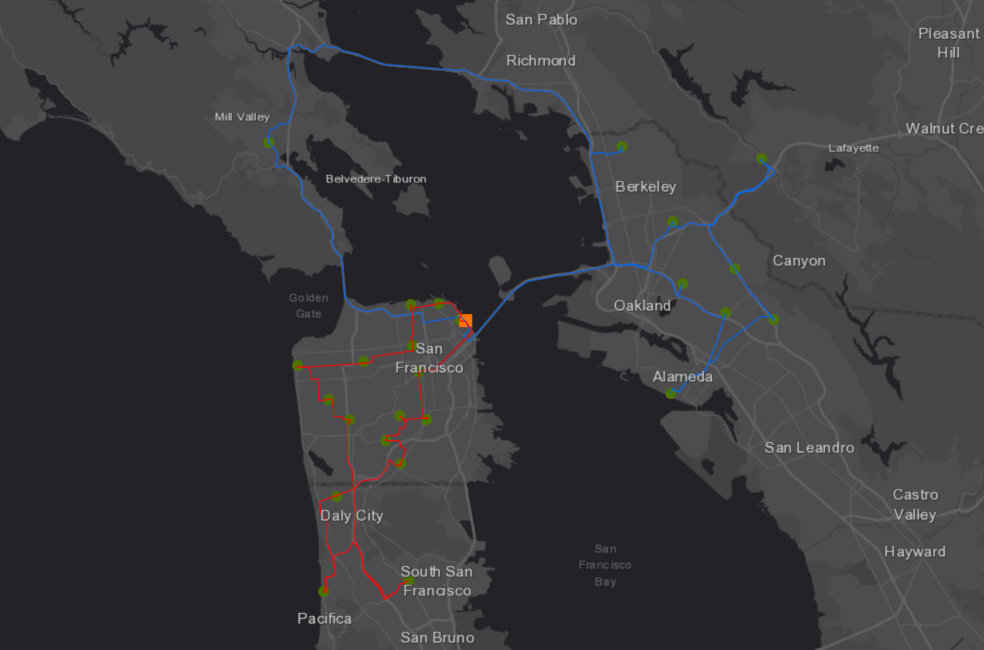

In [42]:
# Display the analysis results in a map.

# Create a map of SF, California.
map2 = my_gis.map('San Francisco, CA')
map2.basemap = 'dark-gray'
map2.layout.height = '650px'
map2

In [41]:
map2.clear_graphics()
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_vehicle_routing_problem_results(map2, result2, 
                                          orders_fset=stores_fset, depots_fset=distribution_center_fset, zoom_level=8)

Judging from `map2`, we can see that Truck_1 now takes over the `stop_8` located on the north west of the SF area (which used to be serviced by Truck_3 in solution 1), and Truck_3 almost takes over all other stops that were owned by Truck_2 previously.

Also note that when `populate_directions` is set to True, and the language option specified, we will get a FeatureSet object of out_directions which can then be used as navigation descriptions to drivers.

In [43]:
df = result2.out_directions.sdf
datetimes = pd.to_datetime(df["ArriveTime"], unit="s")

df["ArriveTime"] = datetimes.apply(lambda x: x.strftime("%H:%M:%S"))
df2 = df[["ArriveTime", "DriveDistance", "ElapsedTime", "Text"]]
df2.head()

,ArriveTime,DriveDistance,ElapsedTime,Text
0,08:00:00,0.000000,60.000000,Salga desde San Francisco
1,08:00:00,0.000000,60.000000,Tiempo de servicio: 1 hora
2,09:00:00,0.043313,0.259881,Vaya al noroeste por The Embarcadero (World Tr...
3,09:00:15,0.278870,1.669606,Cambie de sentido en Pier 1 y vuelva por The E...
4,09:01:55,0.043920,0.352455,Gire a la derecha por Mission St


In [44]:
df2.tail()

,ArriveTime,DriveDistance,ElapsedTime,Text
308,17:54:26,0.253875,1.189822,Siga adelante por 13th St
309,17:55:38,0.009185,0.048630,Gire a la derecha por Folsom St
310,17:55:40,2.059710,12.668623,Cambie de sentido en Erie St y vuelva por Fols...
311,18:08:12,0.456899,2.613210,Gire a la izquierda por The Embarcadero (Herb ...
312,18:10:57,0.000000,0.000000,"Ha llegado a San Francisco, que se encuentra a..."


## Solution 3: Delineates work territories


The third example is to delineate work territories for given routes. This scenario is needed whenever -
 - Some of your employees don't have the required permits to perform work in certain states or communities. You can create a hard route zone so they only visit orders in areas where they meet the requirements.
 - One of your vehicles breaks down frequently so you want to minimize response time by having it only visit orders that are close to your maintenance garage. You can create a soft or hard route zone to keep the vehicle nearby <a href="#References"> [6]</a>.

**Say now driver_2 has come back from vacation and again the number of operational vehicles is back to 3. However, there are three restricted areas for truck_1, truck_2, and truck_3, individually, that upon entering these zones, the trucks will need to go through check points and additional penalty costs will be added on to the whole trip. What will be the optimal routing and dispatching options for the distributors now?**

In solving the problem when there are prohibited zones for each vehicle's route, we will need to use two (optional) parameters:
 - `Route Zone` A "route zone" is a polygon feature and is used to constrain routes to servicing only those orders that fall within or near the specified area. Here are some examples of when route zones may be useful:

   - When specifying the route zones, you need to set properties for each one, such as its associated route, by using attributes. The route zones can be specified with the following attributes:
     - `ObjectID` The system-managed ID field.
     - `RouteName` The name of the route to which this zone applies. A route zone can have a maximum of one associated route. This field can't contain null values, and it is a foreign key to the Name field in the Routes.
     - `IsHardZone` A Boolean value indicating a hard or soft route zone. A True value indicates that the route zone is hard; that is, an order that falls outside the route zone polygon can't be assigned to the route. The default value is 1 (True). A False value (0) indicates that such orders can still be assigned, but the cost of servicing the order is weighted by a function that is based on the Euclidean distance from the route zone. Basically, this means that as the straight-line distance from the soft zone to the order increases, the likelihood of the order being assigned to the route decreases.

 - `spatially_cluster_routes` variable (Boolean). It can be chosen from:
   - CLUSTER (True)—Dynamic seed points are automatically created for all routes, and the orders assigned to an individual route are spatially clustered. Clustering orders tends to keep routes in smaller areas and reduce how often different route lines intersect one another; yet, clustering also tends to increase overall travel times.
   - NO_CLUSTER (False)—Dynamic seed points aren't created. Choose this option if route zones are specified.
     - `spatially_cluster_routes` must be False if you plan to consider the `route zones` to be avoided.


### Define the Route_Zone Feature Class

Here, we have hand picked three route zones for each one of the dispatched vehicles to avoid (Also note that besides the three attributes mentioned previously, we also have `Shape` defined in the JSON which serves as the geometry field indicating the geographic location of the network analysis object):

In [45]:
# Near the "3000 Vicente Ave", polygon is defined as -
route_zone1_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-13636710.935881224, 4542531.164651311], [-13636553.881674716, 4542544.899429826], [-13636548.507196166, 4542486.078747922], [-13636701.082670549, 4542482.495762222], [-13636710.935881224, 4542531.164651311]]]}

# Near the "2500 McGee Ave", polygon is defined as -
route_zone2_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[13392417.252131527, 1874873.2863677784], [13392479.357216991, 1874862.8359928208], [13392465.622438475, 1874829.3947929563], [13392410.981906554, 1874841.3380786222], [13392417.252131527, 1874873.2863677784]]]}

# Near the "3000 Vicente Ave", polygon is defined as -
route_zone3_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-13636086.302040638, 4542576.847728112], [-13636018.822476596, 4542576.847728112], [-13636024.794119433, 4542509.36816407], [-13636087.496369205, 4542497.424878399], [-13636086.302040638, 4542576.847728112]]]}

In [46]:
route_zones_fset= FeatureSet.from_dict({
    "features": [{"attributes": {"Shape": route_zone1_json,
                                 "ObjectID": "1",
                                 "RouteName": "Truck_1",
                                 "IsHardZone":0},
                  "geometry": {'rings': route_zone1_json['rings']}},
                 {"attributes": {"Shape": route_zone2_json,
                                 "ObjectID": "2",
                                 "RouteName": "Truck_2",
                                 "IsHardZone":0},
                  "geometry": {'rings': route_zone2_json['rings']}},
                 {"attributes": {"Shape": route_zone3_json,
                                 "ObjectID": "3",
                                 "RouteName": "Truck_3",
                                 "IsHardZone":0},
                  "geometry": {'rings': route_zone3_json['rings']}}],
    "spatialReference": {'latestWkid': 3857, 'wkid': 102100},
    "geometryType": "esriGeometryPolygon",
    "fields": [
        {"name" : "OBJECTID", "type" : "esriFieldTypeString", "alias" : "ObjectID", "length" : "50"},
        {"name" : "ROUTENAME", "type" : "esriFieldTypeString", "alias" : "RouteName", "length" : "50"},
        {"name" : "ISHARDZONE", "type" : "esriFieldTypeInteger", "alias" : "IsHardZone"},
        {"name" : "SHAPE", "type" : "esriFieldTypeGeometry", "alias" : "Shape"}
    ]})
route_zones_fset

<FeatureSet> 3 features

### Modify the Routes Feature Class

Because of the newly added restricted areas (in `route_zones`), if we continue to use the previously defined `routes` feature class, the `solve_vehicle_routing_problem` tool is not able to provide a complete solution due to time and distance constraints. To avoid generating partial solution, let's broaden the `MaxTotalTime` for each vehicle from 360 to 480.

In [47]:
routes3_csv = "data/vrp/routes_solution3.csv"

# Read the csv file
route_df3 = pd.read_csv(routes3_csv)
route_df3

,ObjectID,Name,StartDepotName,EndDepotName,StartDepotServiceTime,EarliestStartTime,LatestStartTime,Capacities,CostPerUnitTime,CostPerUnitDistance,MaxTotalTime,MaxTotalTravelTime,MaxTotalDistance,AssignmentRule,OvertimeStartTime,CostPerUnitOvertime,MaxOrderCount
0,1,Truck_1,San Francisco,San Francisco,60,8:00:00,8:00:00,15000,0.2,1.5,480,<Null>,<Null>,1,360,0.3,15
1,2,Truck_2,San Francisco,San Francisco,60,8:00:00,8:00:00,15000,0.2,1.5,480,<Null>,<Null>,1,360,0.3,15
2,3,Truck_3,San Francisco,San Francisco,60,8:00:00,8:00:00,15000,0.2,1.5,480,<Null>,<Null>,1,360,0.3,15


In [48]:
routes_fset3 = FeatureSet.from_dataframe(route_df3)
display(routes_fset3)

<FeatureSet> 3 features

### SolveVRP

The VRP solver now re-calculates the three routes that can be used to service the orders and draws lines connecting the orders. The two additional arguments being used here are `spatially_cluster_routes=False`, and `route_zones=route_zones_fset`.

In [49]:
%%time

result3 = network.analysis.solve_vehicle_routing_problem(orders=stores_fset, depots=distribution_center_fset, 
                                                         routes=routes_fset3,                                                          
                                                         default_date=current_date, 
                                                         impedance="TruckTravelTime",
                                                         time_impedance="TruckTravelTime",
                                                         populate_route_lines=True,
                                                         populate_directions=True,
                                                         spatially_cluster_routes=False,
                                                         route_zones=route_zones_fset,
                                                         future=False)

print('Analysis succeeded? {}'.format(result3.solve_succeeded))

WARNING 030194: Data values longer than 500 characters for field [Routes:StartDepotName] are truncated.
WARNING 030194: Data values longer than 500 characters for field [Routes:EndDepotName] are truncated.
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


Analysis succeeded? True
Wall time: 16.3 s


Here, `result3` is an `arcgis.geoprocessing._support.ToolOutput` Class object, and contains multiple objects - out_routes (FeatureSet), out_stops(FeatureSet), etc.

In [50]:
result3

ToolOutput(out_unassigned_stops=<FeatureSet> 0 features, out_stops=<FeatureSet> 31 features, out_routes=<FeatureSet> 3 features, out_directions=<FeatureSet> 356 features, solve_succeeded=True, out_network_analysis_layer=None, out_route_data=None, out_result_file=None)

In [51]:
# Display the analysis results in a table.
# Display the analysis results in a pandas dataframe.
out_routes_df = result3.out_routes.sdf
out_routes_df[['Name','OrderCount','StartTime','EndTime',
               'TotalCost','TotalDistance','TotalTime','TotalTravelTime']]

,Name,OrderCount,StartTime,EndTime,TotalCost,TotalDistance,TotalTime,TotalTravelTime
0,Truck_1,10,2019-10-16 08:00:00,2019-10-16 15:54:24.326999903,231.119671,83.198690,474.405454,181.405454
1,Truck_2,2,2019-10-16 08:00:00,2019-10-16 11:27:32.061000109,108.957267,44.966930,207.534358,94.534358
2,Truck_3,13,2019-10-16 08:00:00,2019-10-16 15:49:46.572000027,150.680429,30.498381,469.776192,109.776192


We can see from the table output above, with the work territories delineated, the optimal routing option has become for Truck_1 to visit 10 stops, Truck_2 to visit 2, and Truck_3 to visit 13 stops, such that the total cost is now 231.12 + 108.96 + 46.57 = 385.65, total distance is 83.20 + 44.97 + 30.50 = 158.67, and the total travel time becomes 181.41 + 94.53 + 109.78 = 385.72.

Comparing to the results we have got from solutions 1 and 2, we can look at this table:

| Scenario       | Total Cost      |  Total Distance  |  Total Travel Time | Scheduled Stops |
|----------------|-----------------|------------------|------------------|------------------|
| #1             | 421.33          | 132.05           |      350.22      |      [8,6,11]      |
| #2             | 408.44          | 120.98           |      310.56     |      [9,0,16]      |
| #3             | 385.65          | 158.67           |      385.72     |      [10,2,13]      |

Scenario #1 provides a solution that takes the least of total time, while scenario #2 reflects the least of total distance and travel time, and scenario #3 solves the VRP with the least of total cost.

In [52]:
out_stops_df = result3.out_stops.sdf
out_stops_df[['Name','RouteName','Sequence','ArriveTime','DepartTime']].sort_values(by=['RouteName',
                                                                                        'Sequence'])

,Name,RouteName,Sequence,ArriveTime,DepartTime
25,San Francisco,Truck_1,1,2019-10-16 08:00:00.000000000,2019-10-16 09:00:00.000000000
18,Store_19,Truck_1,2,2019-10-16 09:01:38.371999979,2019-10-16 09:29:38.371999979
5,Store_6,Truck_1,3,2019-10-16 09:54:36.434000015,2019-10-16 10:20:36.434000015
10,Store_11,Truck_1,4,2019-10-16 10:30:26.131000042,2019-10-16 10:48:26.131000042
20,Store_21,Truck_1,5,2019-10-16 11:33:52.900000095,2019-10-16 11:56:52.900000095
21,Store_22,Truck_1,6,2019-10-16 12:05:11.308000088,2019-10-16 12:31:11.308000088
9,Store_10,Truck_1,7,2019-10-16 12:44:52.739000082,2019-10-16 13:10:52.739000082
22,Store_23,Truck_1,8,2019-10-16 13:20:45.673000097,2019-10-16 13:38:45.673000097
24,Store_25,Truck_1,9,2019-10-16 13:42:59.243999958,2019-10-16 14:05:59.243999958
23,Store_24,Truck_1,10,2019-10-16 14:12:45.342000008,2019-10-16 14:36:45.342000008



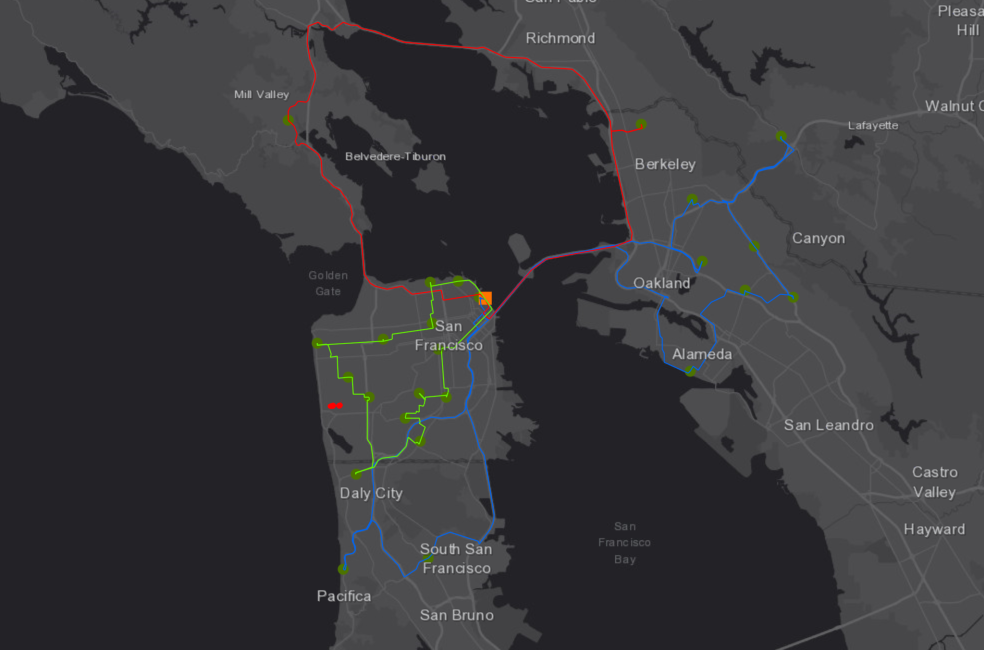

In [58]:
# Display the analysis results in a map.

# Create a map of Visalia, California.
map3 = my_gis.map('San Francisco, CA')
map3.basemap = 'dark-gray'
map3.layout.height = '650px'
map3

Before visualizing the routing outputs onto the map, let's first render the restricted area `route_zones` with the customized symbol.

In [57]:
route_zones_sym = {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,165,0,0],
    "outline": {
        "type": "esriSLS",
        "style": "esriSLSSolid",
        "color": [255,0,0,255],
        "width": 4}
}

map3.draw(route_zones_fset, symbol=route_zones_sym)

In [56]:
# Call custom function defined earlier in this notebook to 
# display the analysis results in the map.
visualize_vehicle_routing_problem_results(map3, result3,
                                          orders_fset=stores_fset, depots_fset=distribution_center_fset, zoom_level=8)

From `map3`, we can see that Truck_1 now needs to service both east and west sides of the SF area, Truck_2 no longer service the downtown but instead tours the entire bay, and Truck_3 here traversed a total of 13 stops even though that seemingly covered area is the smallest.

Not only that we can save the output as zipped file and publish it as a routing layer, we can also save the entire map as a web map on ArcGIs online or Enterprise.

In [59]:
item_properties = {
    "title": "VRP Solution of Grocery Stores in San Francisco",
    "tags" : "VRP",
    "snippet": "example to VRP Solution of Grocery Stores in San Francisco",
    "description": "a web map of VRP Solution of Grocery Stores in San Francisco",
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer",
    "extent" : map3.extent
}

item = map3.save(item_properties)
item

<Item title:"VRP Solution of Grocery Stores in San Francisco" type:Web Map owner:arcgis_python>

## Conclusions

The network module of the ArcGIS API for Python allows you to solve a Vehicle Routing Problem and other network problems with necessary business constraints. In this part of guide, we have explored three different scenarios: (1) Basic scenario, given the stores to visit, the distribution center to load supplies, and the vehicle(s) to deliver goods; (2) Modified scenario, when one of the truck drivers go on vacation, and overtime is required; and (3) With work territories delineated, assuming that certain areas cannot be visited on the route (or under certain penalties if visited). These solutions tend to meet different requirements of the least total cost, the least travel time, and the least distance, respectively. To learn more about how to solve VRP with business constraints <a href="https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.network.analysis.html#solve-vehicle-routing-problem">here</a>.

## References

[1] "Algorithms used by network analysts", https://pro.arcgis.com/en/pro-app/help/analysis/networks/algorithms-used-by-network-analyst.htm, accessed on 10/11/2019

[2] "Asynchronous network analysis services", https://developers.arcgis.com/python/guide/performing-network-analysis-tasks-asynchronously/, accessed on 10/09/2019

[3] "Exercise 7: Servicing a set of orders with a fleet of vehicles", https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/exercise-7-servicing-a-set-of-orders-with-a-fleet-of-vehicles.htm, accessed on 10/14/2019

[4] "Finding routes for appliance delivery with vrp solver", https://developers.arcgis.com/python/sample-notebooks/finding-routes-for-appliance-delivery-with-vrp-solver/, accessed on 10/10/2019

[5] "SolveVehicleRoutingProblem", https://logistics.arcgis.com/arcgis/rest/directories/arcgisoutput/World/VehicleRoutingProblem_GPServer/World_VehicleRoutingProblem/SolveVehicleRoutingProblem.htm, accessed on 10/15/2019

[6] "Vehicle Routing Problem", https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/vehicle-routing-problem.htm#GUID-CE6AAC02-72EE-41E3-A913-74BC750C4545, accessed on 10/15/2019